Set Up

In [1]:
# Library Set-up

!pip install pandas openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Load datasets for 2025

df_sp = pd.read_excel("25 Starting Pitching.xlsx")
df_b = pd.read_excel("25 Batting.xlsx")
df_f = pd.read_excel("25 Fielding.xlsx")
df_r = pd.read_excel("25 Relief.xlsx")
df_w = pd.read_excel("Ind_Project Dataset.xlsx")

Defaulting to user installation because normal site-packages is not writeable


Data Cleaning / Compiling

In [2]:
#Identify tracking variables
cols_keep_df_sp = ["Tm", "QS%", "GmScA", "IP/GS"]
cols_keep_df_b = ["Tm", "R/G", "SB", "BA", "OBP", "SLG", "HR"]
cols_keep_df_f = ["Tm", "DefEff", "E", "Rdrs"]
cols_keep_df_r = ["Tm", "SV%"]
cols_keep_df_w = ["Tm", "W"]

#Reduce to key variables
df_sp = df_sp[cols_keep_df_sp]
df_b = df_b[cols_keep_df_b]
df_f = df_f[cols_keep_df_f]
df_r = df_r[cols_keep_df_r]
df_w = df_w[cols_keep_df_w]

#Merge
df = (
    df_w
    .merge(df_sp, on="Tm", how="left")
    .merge(df_b,  on="Tm", how="left")
    .merge(df_f,  on="Tm", how="left")
    .merge(df_r,  on="Tm", how="left")
)

print(df.head())

                     Tm     W   QS%  GmScA  IP/GS   R/G     SB     BA    OBP  \
0  Arizona Diamondbacks  80.0  0.42   51.0    5.5  4.88  121.0  0.251  0.325   
1             Athletics  76.0  0.27   49.0    5.0  4.52   80.0  0.253  0.318   
2        Atlanta Braves  76.0  0.43   51.0    5.3  4.47   82.0  0.245  0.320   
3     Baltimore Orioles  75.0  0.33   49.0    5.1  4.18  121.0  0.235  0.305   
4        Boston Red Sox  89.0  0.44   52.0    5.3  4.85  139.0  0.254  0.324   

     SLG     HR  DefEff      E  Rdrs   SV%  
0  0.433  214.0   0.695   84.0  -9.0  0.59  
1  0.431  219.0   0.698   88.0   1.0  0.64  
2  0.399  190.0   0.698   54.0  -3.0  0.62  
3  0.394  191.0   0.684   88.0   2.0  0.66  
4  0.421  186.0   0.691  116.0 -15.0  0.62  


Batting and Base Running

Runs per Game vs Wins

In [3]:
# Determine correlation matrix

cm_RPG = df[["W", "R/G"]].corr()
cv_RPG = cm_RPG.iloc[0, 1]
cm_RPG

,W,R/G
W,1.000000,0.711587
R/G,0.711587,1.000000


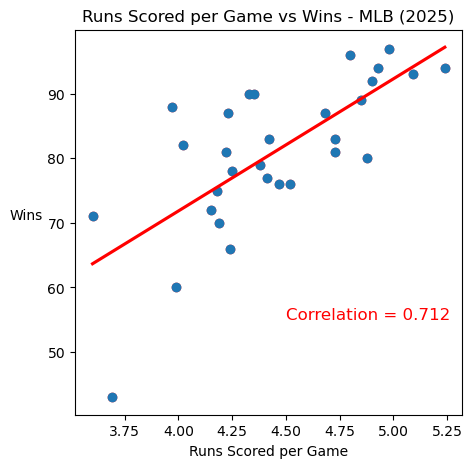

In [4]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["R/G"], df["W"], "o",)
sns.regplot(x = "R/G", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Runs Scored per Game")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Runs Scored per Game vs Wins - MLB (2025)")
plt.text(4.5, 55, f"Correlation = {cv_RPG:.3f}", color = "red", size = 12)
plt.show()

Stolen Bases vs Wins

In [5]:
# Determine correlation matrix

cm_SB = df[["W", "SB"]].corr()
cv_SB = cm_SB.iloc[0, 1]
cm_SB

,W,SB
W,1.000000,0.172131
SB,0.172131,1.000000


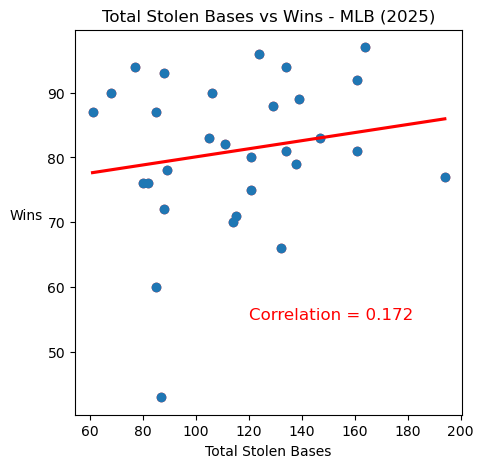

In [6]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["SB"], df["W"], "o",)
sns.regplot(x = "SB", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Total Stolen Bases")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Total Stolen Bases vs Wins - MLB (2025)")
plt.text(120, 55, f"Correlation = {cv_SB:.3f}", color = "red", size = 12)
plt.show()

Batting Average vs Wins

In [7]:
# Determine correlation matrix

cm_BA = df[["W", "BA"]].corr()
cv_BA = cm_BA.iloc[0, 1]
cm_BA

,W,BA
W,1.000000,0.556822
BA,0.556822,1.000000


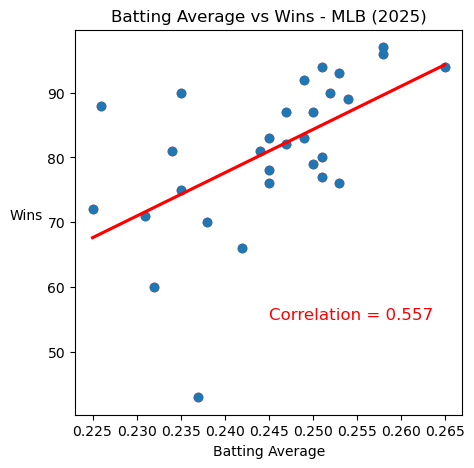

In [8]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["BA"], df["W"], "o",)
sns.regplot(x = "BA", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Batting Average")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Batting Average vs Wins - MLB (2025)")
plt.text(0.245, 55, f"Correlation = {cv_BA:.3f}", color = "red", size = 12)
plt.show()

On Base Percentage vs Wins

In [9]:
# Determine correlation matrix

cm_OB = df[["W", "OBP"]].corr()
cv_OB = cm_OB.iloc[0, 1]
cm_OB

,W,OBP
W,1.000000,0.724417
OBP,0.724417,1.000000


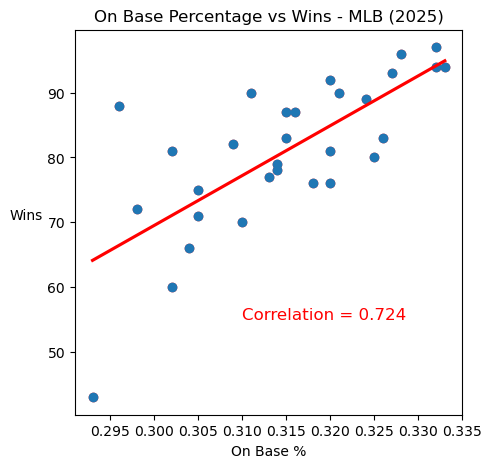

In [10]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["OBP"], df["W"], "o",)
sns.regplot(x = "OBP", y = "W", data = df, ci = None, color = "red")
plt.xlabel("On Base %")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("On Base Percentage vs Wins - MLB (2025)")
plt.text(0.31, 55, f"Correlation = {cv_OB:.3f}", color = "red", size = 12)
plt.show()

Slugging Percentage vs Wins

In [11]:
# Determine correlation matrix

cm_SL = df[["W", "SLG"]].corr()
cv_SL = cm_SL.iloc[0, 1]
cm_SL

,W,SLG
W,1.000000,0.500019
SLG,0.500019,1.000000


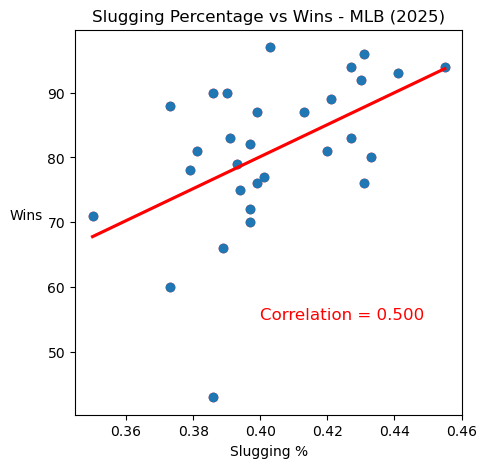

In [12]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["SLG"], df["W"], "o",)
sns.regplot(x = "SLG", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Slugging %")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Slugging Percentage vs Wins - MLB (2025)")
plt.text(0.4, 55, f"Correlation = {cv_SL:.3f}", color = "red", size = 12)
plt.show()

Home Runs vs Wins

In [13]:
# Determine correlation matrix

cm_HR = df[["W", "HR"]].corr()
cv_HR = cm_HR.iloc[0, 1]
cm_HR

,W,HR
W,1.000000,0.342177
HR,0.342177,1.000000


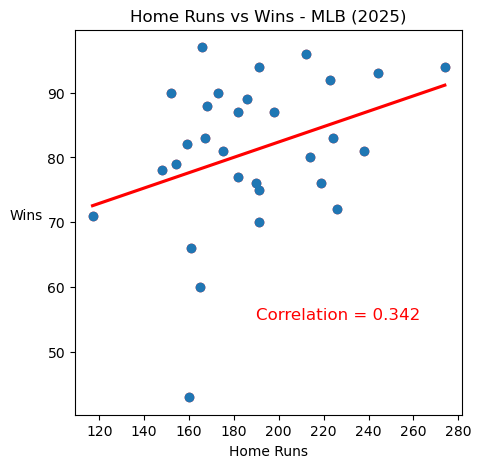

In [14]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["HR"], df["W"], "o",)
sns.regplot(x = "HR", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Home Runs")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Home Runs vs Wins - MLB (2025)")
plt.text(190, 55, f"Correlation = {cv_HR:.3f}", color = "red", size = 12)
plt.show()

Fielding

Defensive Efficiency vs Wins

In [15]:
# Determine correlation matrix

cm_DE = df[["W", "DefEff"]].corr()
cv_DE = cm_DE.iloc[0, 1]
cm_DE

,W,DefEff
W,1.000000,0.592127
DefEff,0.592127,1.000000


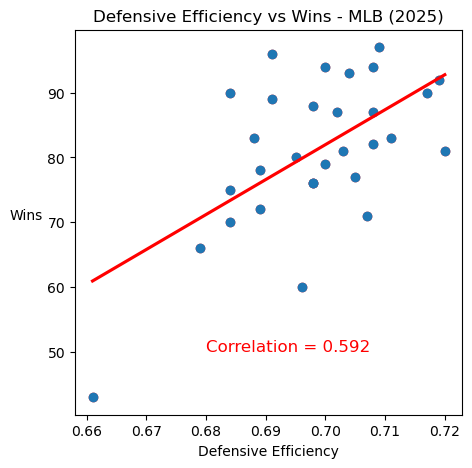

In [16]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["DefEff"], df["W"], "o",)
sns.regplot(x = "DefEff", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Defensive Efficiency")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Defensive Efficiency vs Wins - MLB (2025)")
plt.text(0.68, 50, f"Correlation = {cv_DE:.3f}", color = "red", size = 12)
plt.show()

Errors vs Wins

In [17]:
# Determine Correlation Matrix

cm_E = df[["W", "E"]].corr()
cv_E = cm_E.iloc[0, 1]
cm_E

,W,E
W,1.0000,-0.3628
E,-0.3628,1.0000


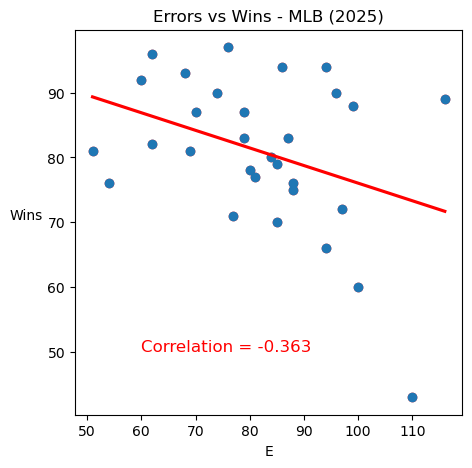

In [18]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["E"], df["W"], "o",)
sns.regplot(x = "E", y = "W", data = df, ci = None, color = "red")
plt.xlabel("E")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Errors vs Wins - MLB (2025)")
plt.text(60, 50, f"Correlation = {cv_E:.3f}", color = "red", size = 12)
plt.show()

Defensive Runs Saved vs Wins

In [19]:
# Determine Correlation Matrix

cm_DR = df[["W", "Rdrs"]].corr()
cv_DR = cm_DR.iloc[0, 1]
cm_DR

,W,Rdrs
W,1.000000,0.323775
Rdrs,0.323775,1.000000


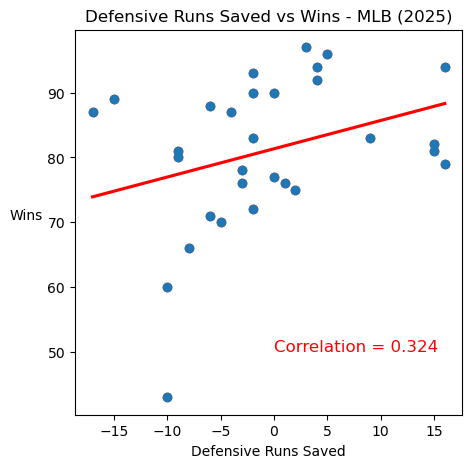

In [20]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["Rdrs"], df["W"], "o",)
sns.regplot(x = "Rdrs", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Defensive Runs Saved")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Defensive Runs Saved vs Wins - MLB (2025)")
plt.text(0, 50, f"Correlation = {cv_DR:.3f}", color = "red", size = 12)
plt.show()

Pitching

Quality Start Percentage vs Wins

In [21]:
# Determine Correlation Matrix

cm_QS = df[["W", "QS%"]].corr()
cv_QS = cm_QS.iloc[0, 1]
cm_QS

,W,QS%
W,1.000000,0.501461
QS%,0.501461,1.000000


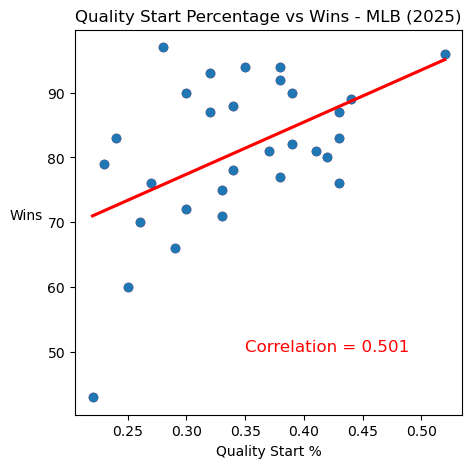

In [22]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["QS%"], df["W"], "o",)
sns.regplot(x = "QS%", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Quality Start %")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Quality Start Percentage vs Wins - MLB (2025)")
plt.text(0.35, 50, f"Correlation = {cv_QS:.3f}", color = "red", size = 12)
plt.show()

Average Game Score vs Wins

In [23]:
# Determine Correlation Matrix

cm_GMS = df[["W", "GmScA"]].corr()
cv_GMS = cm_GMS.iloc[0, 1]
cm_GMS

,W,GmScA
W,1.000000,0.782801
GmScA,0.782801,1.000000


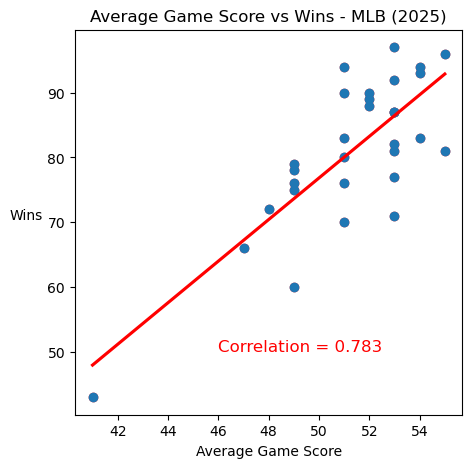

In [24]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["GmScA"], df["W"], "o",)
sns.regplot(x = "GmScA", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Average Game Score")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Average Game Score vs Wins - MLB (2025)")
plt.text(46, 50, f"Correlation = {cv_GMS:.3f}", color = "red", size = 12)
plt.show()

Innings Pitched per Game Started vs Wins

In [25]:
# Determine Correlation Matrix

cm_IP = df[["W", "IP/GS"]].corr()
cv_IP = cm_IP.iloc[0, 1]
cm_IP

,W,IP/GS
W,1.000000,0.454286
IP/GS,0.454286,1.000000


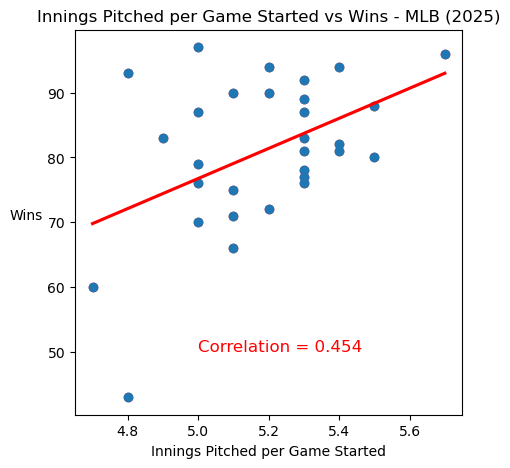

In [26]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["IP/GS"], df["W"], "o",)
sns.regplot(x = "IP/GS", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Innings Pitched per Game Started")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Innings Pitched per Game Started vs Wins - MLB (2025)")
plt.text(5, 50, f"Correlation = {cv_IP:.3f}", color = "red", size = 12)
plt.show()

Save Percentage vs Wins

In [27]:
# Determine Correlation Matrix

cm_S = df[["W", "SV%"]].corr()
cv_S = cm_S.iloc[0, 1]
cm_S

,W,SV%
W,1.000000,0.637147
SV%,0.637147,1.000000


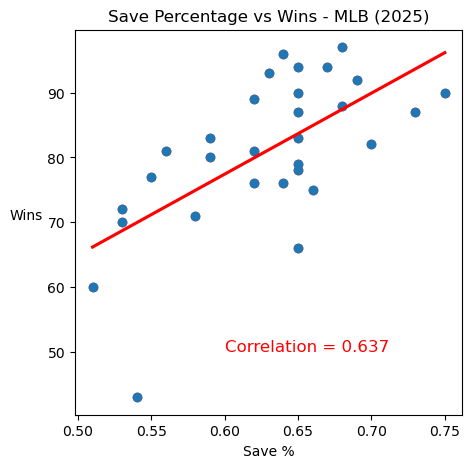

In [28]:
# Plot Relationship

plt.figure(figsize = (5, 5))
plt.plot(df["SV%"], df["W"], "o",)
sns.regplot(x = "SV%", y = "W", data = df, ci = None, color = "red")
plt.xlabel("Save %")
plt.ylabel("Wins", rotation = 0, labelpad=15)
plt.title("Save Percentage vs Wins - MLB (2025)")
plt.text(0.6, 50, f"Correlation = {cv_S:.3f}", color = "red", size = 12)
plt.show()

Compute mean coefficients for batting, fielding, pitching

In [29]:
#Put coefs into lists
batting_corrs = [cv_SB, cv_BA, cv_OB, cv_SL, cv_HR]
fielding_corrs = [cv_DE, cv_E, cv_DR]
pitching_corrs = [cv_QS, cv_GMS, cv_IP, cv_S]

In [30]:
#Compute means
batting_mean  = np.mean(batting_corrs)
print(batting_mean)
fielding_mean = np.mean(np.abs(fielding_corrs))
print(fielding_mean)
pitching_mean = np.mean(pitching_corrs)
print(pitching_mean)

0.4591133119168
0.42623436264191056
0.5939237391542689


In [33]:
#Create data frame to create chart

df_coeffs = pd.DataFrame({"Category": ["Pitching", "Batting", "Fielding"], 
                           "Overall Coeffs": [pitching_mean, batting_mean, fielding_mean]})

df_coeffs

,Category,Overall Coeffs
0,Pitching,0.593924
1,Batting,0.459113
2,Fielding,0.426234


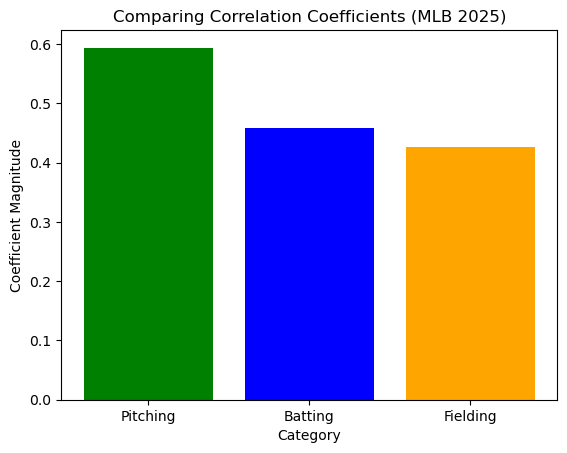

In [37]:
#Creat bar chart

colors = ["green", "blue", "orange"]
plt.bar(df_coeffs["Category"], df_coeffs["Overall Coeffs"], color = colors)
plt.xlabel("Category")
plt.ylabel("Coefficient Magnitude")
plt.title("Comparing Correlation Coefficients (MLB 2025)")
plt.show()
